In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Criando o conjunto de dados
data = pd.DataFrame({
    'consumo_kWh': [1000, 3000, 1500, 2500, 1200, 3500],
    'horas_operação': [200, 500, 300, 400, 250, 600],
    'tipo_energia': ['elétrica', 'gás', 'elétrica', 'gás', 'elétrica', 'gas'],
    'classif': ['eficiente', 'ineficiente', 'eficiente', 'ineficiente', 'eficiente', 'ineficiente']
})

In [4]:
# Codificando variáveis categóricas
data = pd.get_dummies(data, columns=['tipo_energia'], drop_first=True)

# Separando as características e a variável alvo
X = data.drop('classif', axis=1)
y = data['classif']

In [5]:
# Dividindo o conjunto de dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Criando e treinando o modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_treino, y_treino)

# Fazendo previsões
y_pred = model.predict(X_teste)

In [7]:
# Avaliando o modelo
accuracy = accuracy_score(y_teste, y_pred)
report = classification_report(y_teste, y_pred)

print(f"Acurácia: {accuracy}")
print("Relatório de Classificação:\n", report)

Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

   eficiente       1.00      1.00      1.00         1
 ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



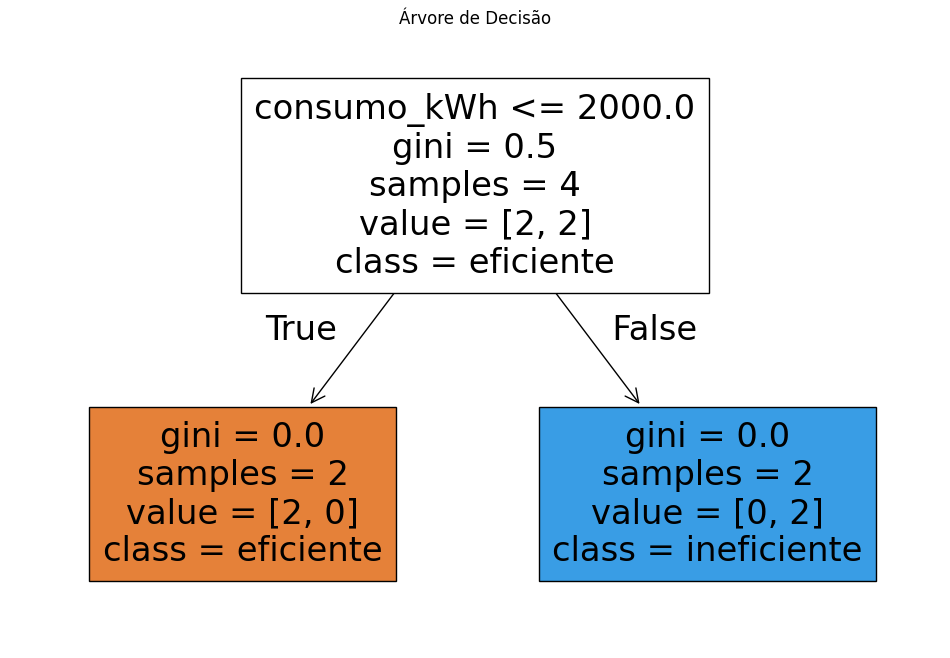

In [10]:
# Visualizando a árvore de decisão
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.title('Árvore de Decisão')
plt.show()